<center><h2>Artificial and Computational Intelligence</h2></center>
<center><h3>(Assignment) Spinning the Bayes Network</h3></center>

In [1]:
#Import required packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 

import math
import numpy as np
# data processing 
import pandas as pd 
import pomegranate as pg
from pomegranate import *
from itertools import permutations 

In [2]:
#Read data
df = pd.read_excel('India_Test_Stats.xlsx')
df.head()

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date
0,Y,won,5 wickets,lost,2nd,v West Indies,Home,2011-11-06
1,Y,won,inns & 15 runs,won,1st,v West Indies,Home,2011-11-14
2,Y,draw,-,lost,2nd,v West Indies,Home,2011-11-22
3,Y,lost,122 runs,lost,2nd,v Australia,Away,2011-12-26
4,Y,lost,inns & 68 runs,won,1st,v Australia,Away,2012-01-03


In [3]:
#Data Description
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ashwin      85 non-null     object        
 1   Result      85 non-null     object        
 2   Margin      85 non-null     object        
 3   Toss        85 non-null     object        
 4   Bat         85 non-null     object        
 5   Opposition  85 non-null     object        
 6   Location    85 non-null     object        
 7   Start Date  85 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(7)
memory usage: 5.4+ KB


In [4]:
df.shape

(85, 8)

* The dataset contains 85 rows and 8 columns 

In [5]:
df.describe()

,Ashwin,Result,Margin,Toss,Bat,Opposition,Location,Start Date
count,85,85,85,85,85,85,85,85
unique,2,3,61,2,2,8,2,85
top,Y,won,-,lost,1st,v Australia,Home,2019-11-22 00:00:00
freq,70,47,16,45,46,20,43,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-06 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-22 00:00:00


### Data Description 
#### Data Preparation and Cleaning

In [6]:
df.isnull().sum()

Ashwin        0
Result        0
Margin        0
Toss          0
Bat           0
Opposition    0
Location      0
Start Date    0
dtype: int64

* There is no missing data .

In [7]:
print(df.groupby('Result').size())

Result
draw    16
lost    22
won     47
dtype: int64


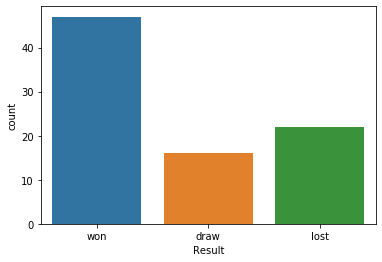

In [8]:
sns.countplot(x='Result',data=df)

### Data preprocessing

In [9]:
df.drop(['Margin', 'Opposition', 'Start Date'],axis=1,inplace=True)
df.shape

(85, 5)

* The column with Margin, Opposition and Start Date do not contribute any information/no role to the model prediction and hence removed.

In [10]:
df.columns.to_list()

['Ashwin', 'Result', 'Toss', 'Bat', 'Location']

In [11]:
df.head()

,Ashwin,Result,Toss,Bat,Location
0,Y,won,lost,2nd,Home
1,Y,won,won,1st,Home
2,Y,draw,lost,2nd,Home
3,Y,lost,lost,2nd,Away
4,Y,lost,won,1st,Away


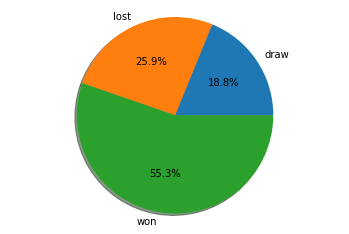

In [12]:
labels = df['Result'].astype('category').cat.categories.tolist()
counts = df['Result'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [13]:
df.Ashwin.unique()

array(['Y', 'N'], dtype=object)

In [14]:
df.Toss.unique()

array(['lost', 'won'], dtype=object)

In [15]:
df.Bat.unique()

array(['2nd', '1st'], dtype=object)

In [16]:
df.Location.unique()

array(['Home', 'Away'], dtype=object)

In [17]:
#Mapping categorical data 
df.Result.unique()

array(['won', 'draw', 'lost'], dtype=object)

In [18]:
df.describe()

,Ashwin,Result,Toss,Bat,Location
count,85,85,85,85,85
unique,2,3,2,2,2
top,Y,won,lost,1st,Home
freq,70,47,45,46,43


### Construction of Bayesian Network 

#### 1). Create a function to calculate prior probability

In [19]:
def priorprobability(array_in):
    wtInput=[]
    p_prob = df.groupby(array_in).size().div(len(df))
    return DiscreteDistribution.from_samples(np.unique(array_in).tolist(), p_prob)


In [20]:
# Iterate over the sequence of column names
for column in df:
    loc_array = np.array(df[column].tolist())
    priorprobability(loc_array)

#### 2). Create a function to calculate conditional probability

In [21]:
def conditionalprobility(Parent,Child):
    c_prob = df.groupby(Parent)[Child].value_counts() / df.groupby(Parent)[Child].count()
    print((c_prob.reset_index(name='cpt').values))
    return(c_prob.reset_index(name='cpt').values.tolist())
    

In [22]:
cond_prob =[]
for x in range(2,6):
    perm = permutations(list(df.columns),x) 
    for i in list(perm): 
        cond_prob.append(conditionalprobility(list(i)[:-1],list(i)[-1]))
        
print(*cond_prob,sep = "\n")        
        

[['N' 'lost' 0.4666666666666667]
 ['N' 'won' 0.3333333333333333]
 ['N' 'draw' 0.2]
 ['Y' 'won' 0.6]
 ['Y' 'lost' 0.21428571428571427]
 ['Y' 'draw' 0.18571428571428572]]
[['N' 'lost' 0.5333333333333333]
 ['N' 'won' 0.4666666666666667]
 ['Y' 'lost' 0.5285714285714286]
 ['Y' 'won' 0.4714285714285714]]
[['N' '1st' 0.6]
 ['N' '2nd' 0.4]
 ['Y' '1st' 0.5285714285714286]
 ['Y' '2nd' 0.4714285714285714]]
[['N' 'Away' 1.0]
 ['Y' 'Home' 0.6142857142857143]
 ['Y' 'Away' 0.38571428571428573]]
[['draw' 'Y' 0.8125]
 ['draw' 'N' 0.1875]
 ['lost' 'Y' 0.6818181818181818]
 ['lost' 'N' 0.3181818181818182]
 ['won' 'Y' 0.8936170212765957]
 ['won' 'N' 0.10638297872340426]]
[['draw' 'lost' 0.5625]
 ['draw' 'won' 0.4375]
 ['lost' 'lost' 0.6818181818181818]
 ['lost' 'won' 0.3181818181818182]
 ['won' 'won' 0.5531914893617021]
 ['won' 'lost' 0.44680851063829785]]
[['draw' '2nd' 0.625]
 ['draw' '1st' 0.375]
 ['lost' '2nd' 0.5909090909090909]
 ['lost' '1st' 0.4090909090909091]
 ['won' '1st' 0.6595744680851063]
 ['w

 ['won' 'won' 'N' 0.07692307692307693]]
[['lost' 'draw' '2nd' 0.8888888888888888]
 ['lost' 'draw' '1st' 0.1111111111111111]
 ['lost' 'lost' '2nd' 0.8]
 ['lost' 'lost' '1st' 0.2]
 ['lost' 'won' '2nd' 0.7142857142857143]
 ['lost' 'won' '1st' 0.2857142857142857]
 ['won' 'draw' '1st' 0.7142857142857143]
 ['won' 'draw' '2nd' 0.2857142857142857]
 ['won' 'lost' '1st' 0.8571428571428571]
 ['won' 'lost' '2nd' 0.14285714285714285]
 ['won' 'won' '1st' 0.9615384615384616]
 ['won' 'won' '2nd' 0.038461538461538464]]
[['lost' 'draw' 'Home' 0.5555555555555556]
 ['lost' 'draw' 'Away' 0.4444444444444444]
 ['lost' 'lost' 'Away' 0.9333333333333333]
 ['lost' 'lost' 'Home' 0.06666666666666667]
 ['lost' 'won' 'Home' 0.7142857142857143]
 ['lost' 'won' 'Away' 0.2857142857142857]
 ['won' 'draw' 'Away' 0.7142857142857143]
 ['won' 'draw' 'Home' 0.2857142857142857]
 ['won' 'lost' 'Away' 0.7142857142857143]
 ['won' 'lost' 'Home' 0.2857142857142857]
 ['won' 'won' 'Home' 0.6923076923076923]
 ['won' 'won' 'Away' 0.307

 ['Home' '2nd' 'won' 0.09090909090909091]]
[['N' 'draw' 'won' '1st' 0.6666666666666666]
 ['N' 'draw' 'won' '2nd' 0.3333333333333333]
 ['N' 'lost' 'lost' '2nd' 0.8]
 ['N' 'lost' 'lost' '1st' 0.2]
 ['N' 'lost' 'won' '1st' 0.5]
 ['N' 'lost' 'won' '2nd' 0.5]
 ['N' 'won' 'lost' '1st' 1.0]
 ['N' 'won' 'won' '1st' 1.0]
 ['Y' 'draw' 'lost' '2nd' 0.8888888888888888]
 ['Y' 'draw' 'lost' '1st' 0.1111111111111111]
 ['Y' 'draw' 'won' '1st' 0.75]
 ['Y' 'draw' 'won' '2nd' 0.25]
 ['Y' 'lost' 'lost' '2nd' 0.8]
 ['Y' 'lost' 'lost' '1st' 0.2]
 ['Y' 'lost' 'won' '1st' 1.0]
 ['Y' 'won' 'lost' '2nd' 0.8333333333333334]
 ['Y' 'won' 'lost' '1st' 0.16666666666666666]
 ['Y' 'won' 'won' '1st' 0.9583333333333334]
 ['Y' 'won' 'won' '2nd' 0.041666666666666664]]
[['N' 'draw' 'won' 'Away' 1.0]
 ['N' 'lost' 'lost' 'Away' 1.0]
 ['N' 'lost' 'won' 'Away' 1.0]
 ['N' 'won' 'lost' 'Away' 1.0]
 ['N' 'won' 'won' 'Away' 1.0]
 ['Y' 'draw' 'lost' 'Home' 0.5555555555555556]
 ['Y' 'draw' 'lost' 'Away' 0.4444444444444444]
 ['Y' 'dr

 ['Y' 'Home' 'won' '2nd' 0.09090909090909091]]
[['N' 'Away' '1st' 'won' 0.5555555555555556]
 ['N' 'Away' '1st' 'draw' 0.2222222222222222]
 ['N' 'Away' '1st' 'lost' 0.2222222222222222]
 ['N' 'Away' '2nd' 'lost' 0.8333333333333334]
 ['N' 'Away' '2nd' 'draw' 0.16666666666666666]
 ['Y' 'Away' '1st' 'won' 0.5625]
 ['Y' 'Away' '1st' 'lost' 0.3125]
 ['Y' 'Away' '1st' 'draw' 0.125]
 ['Y' 'Away' '2nd' 'lost' 0.6363636363636364]
 ['Y' 'Away' '2nd' 'draw' 0.36363636363636365]
 ['Y' 'Home' '1st' 'won' 0.8095238095238095]
 ['Y' 'Home' '1st' 'draw' 0.09523809523809523]
 ['Y' 'Home' '1st' 'lost' 0.09523809523809523]
 ['Y' 'Home' '2nd' 'won' 0.7272727272727273]
 ['Y' 'Home' '2nd' 'draw' 0.22727272727272727]
 ['Y' 'Home' '2nd' 'lost' 0.045454545454545456]]
[['N' 'Away' '1st' 'won' 0.5555555555555556]
 ['N' 'Away' '1st' 'lost' 0.4444444444444444]
 ['N' 'Away' '2nd' 'lost' 0.6666666666666666]
 ['N' 'Away' '2nd' 'won' 0.3333333333333333]
 ['Y' 'Away' '1st' 'won' 0.6875]
 ['Y' 'Away' '1st' 'lost' 0.3125]
 

 ['won' '2nd' 'Y' 'Home' 1.0]]
[['draw' '1st' 'lost' 'Y' 1.0]
 ['draw' '1st' 'won' 'Y' 0.6]
 ['draw' '1st' 'won' 'N' 0.4]
 ['draw' '2nd' 'lost' 'Y' 1.0]
 ['draw' '2nd' 'won' 'N' 0.5]
 ['draw' '2nd' 'won' 'Y' 0.5]
 ['lost' '1st' 'lost' 'Y' 0.6666666666666666]
 ['lost' '1st' 'lost' 'N' 0.3333333333333333]
 ['lost' '1st' 'won' 'Y' 0.8333333333333334]
 ['lost' '1st' 'won' 'N' 0.16666666666666666]
 ['lost' '2nd' 'lost' 'Y' 0.6666666666666666]
 ['lost' '2nd' 'lost' 'N' 0.3333333333333333]
 ['lost' '2nd' 'won' 'N' 1.0]
 ['won' '1st' 'lost' 'N' 0.5]
 ['won' '1st' 'lost' 'Y' 0.5]
 ['won' '1st' 'won' 'Y' 0.92]
 ['won' '1st' 'won' 'N' 0.08]
 ['won' '2nd' 'lost' 'Y' 1.0]
 ['won' '2nd' 'won' 'Y' 1.0]]
[['draw' '1st' 'lost' 'Home' 1.0]
 ['draw' '1st' 'won' 'Away' 0.8]
 ['draw' '1st' 'won' 'Home' 0.2]
 ['draw' '2nd' 'lost' 'Away' 0.5]
 ['draw' '2nd' 'lost' 'Home' 0.5]
 ['draw' '2nd' 'won' 'Away' 0.5]
 ['draw' '2nd' 'won' 'Home' 0.5]
 ['lost' '1st' 'lost' 'Away' 1.0]
 ['lost' '1st' 'won' 'Away' 0.6666

[['lost' 'draw' '1st' 'Home' 1.0]
 ['lost' 'draw' '2nd' 'Away' 0.5]
 ['lost' 'draw' '2nd' 'Home' 0.5]
 ['lost' 'lost' '1st' 'Away' 1.0]
 ['lost' 'lost' '2nd' 'Away' 0.9166666666666666]
 ['lost' 'lost' '2nd' 'Home' 0.08333333333333333]
 ['lost' 'won' '1st' 'Away' 1.0]
 ['lost' 'won' '2nd' 'Home' 1.0]
 ['won' 'draw' '1st' 'Away' 0.8]
 ['won' 'draw' '1st' 'Home' 0.2]
 ['won' 'draw' '2nd' 'Away' 0.5]
 ['won' 'draw' '2nd' 'Home' 0.5]
 ['won' 'lost' '1st' 'Away' 0.6666666666666666]
 ['won' 'lost' '1st' 'Home' 0.3333333333333333]
 ['won' 'lost' '2nd' 'Away' 1.0]
 ['won' 'won' '1st' 'Home' 0.68]
 ['won' 'won' '1st' 'Away' 0.32]
 ['won' 'won' '2nd' 'Home' 1.0]]
[['lost' 'draw' 'Away' 'Y' 1.0]
 ['lost' 'draw' 'Home' 'Y' 1.0]
 ['lost' 'lost' 'Away' 'Y' 0.6428571428571429]
 ['lost' 'lost' 'Away' 'N' 0.35714285714285715]
 ['lost' 'lost' 'Home' 'Y' 1.0]
 ['lost' 'won' 'Away' 'N' 0.5]
 ['lost' 'won' 'Away' 'Y' 0.5]
 ['lost' 'won' 'Home' 'Y' 1.0]
 ['won' 'draw' 'Away' 'N' 0.6]
 ['won' 'draw' 'Away' 'Y

 ['2nd' 'Y' 'won' 'won' 0.0625]]
[['1st' 'N' 'draw' 'Away' 1.0]
 ['1st' 'N' 'lost' 'Away' 1.0]
 ['1st' 'N' 'won' 'Away' 1.0]
 ['1st' 'Y' 'draw' 'Away' 0.5]
 ['1st' 'Y' 'draw' 'Home' 0.5]
 ['1st' 'Y' 'lost' 'Away' 0.7142857142857143]
 ['1st' 'Y' 'lost' 'Home' 0.2857142857142857]
 ['1st' 'Y' 'won' 'Home' 0.6538461538461539]
 ['1st' 'Y' 'won' 'Away' 0.34615384615384615]
 ['2nd' 'N' 'draw' 'Away' 1.0]
 ['2nd' 'N' 'lost' 'Away' 1.0]
 ['2nd' 'Y' 'draw' 'Home' 0.5555555555555556]
 ['2nd' 'Y' 'draw' 'Away' 0.4444444444444444]
 ['2nd' 'Y' 'lost' 'Away' 0.875]
 ['2nd' 'Y' 'lost' 'Home' 0.125]
 ['2nd' 'Y' 'won' 'Home' 1.0]]
[['1st' 'N' 'lost' 'won' 0.75]
 ['1st' 'N' 'lost' 'lost' 0.25]
 ['1st' 'N' 'won' 'draw' 0.4]
 ['1st' 'N' 'won' 'won' 0.4]
 ['1st' 'N' 'won' 'lost' 0.2]
 ['1st' 'Y' 'lost' 'won' 0.5]
 ['1st' 'Y' 'lost' 'lost' 0.3333333333333333]
 ['1st' 'Y' 'lost' 'draw' 0.16666666666666666]
 ['1st' 'Y' 'won' 'won' 0.7419354838709677]
 ['1st' 'Y' 'won' 'lost' 0.16129032258064516]
 ['1st' 'Y' 'w

 ['2nd' 'won' 'Home' 'won' 0.5]]
[['1st' 'Away' 'N' 'won' 0.5555555555555556]
 ['1st' 'Away' 'N' 'draw' 0.2222222222222222]
 ['1st' 'Away' 'N' 'lost' 0.2222222222222222]
 ['1st' 'Away' 'Y' 'won' 0.5625]
 ['1st' 'Away' 'Y' 'lost' 0.3125]
 ['1st' 'Away' 'Y' 'draw' 0.125]
 ['1st' 'Home' 'Y' 'won' 0.8095238095238095]
 ['1st' 'Home' 'Y' 'draw' 0.09523809523809523]
 ['1st' 'Home' 'Y' 'lost' 0.09523809523809523]
 ['2nd' 'Away' 'N' 'lost' 0.8333333333333334]
 ['2nd' 'Away' 'N' 'draw' 0.16666666666666666]
 ['2nd' 'Away' 'Y' 'lost' 0.6363636363636364]
 ['2nd' 'Away' 'Y' 'draw' 0.36363636363636365]
 ['2nd' 'Home' 'Y' 'won' 0.7272727272727273]
 ['2nd' 'Home' 'Y' 'draw' 0.22727272727272727]
 ['2nd' 'Home' 'Y' 'lost' 0.045454545454545456]]
[['1st' 'Away' 'N' 'won' 0.5555555555555556]
 ['1st' 'Away' 'N' 'lost' 0.4444444444444444]
 ['1st' 'Away' 'Y' 'won' 0.6875]
 ['1st' 'Away' 'Y' 'lost' 0.3125]
 ['1st' 'Home' 'Y' 'won' 0.9523809523809523]
 ['1st' 'Home' 'Y' 'lost' 0.047619047619047616]
 ['2nd' 'Away

 ['Home' 'won' 'won' '2nd' 0.05555555555555555]]
[['Away' 'draw' '1st' 'N' 0.5]
 ['Away' 'draw' '1st' 'Y' 0.5]
 ['Away' 'draw' '2nd' 'Y' 0.8]
 ['Away' 'draw' '2nd' 'N' 0.2]
 ['Away' 'lost' '1st' 'Y' 0.7142857142857143]
 ['Away' 'lost' '1st' 'N' 0.2857142857142857]
 ['Away' 'lost' '2nd' 'Y' 0.5833333333333334]
 ['Away' 'lost' '2nd' 'N' 0.4166666666666667]
 ['Away' 'won' '1st' 'Y' 0.6428571428571429]
 ['Away' 'won' '1st' 'N' 0.35714285714285715]
 ['Home' 'draw' '1st' 'Y' 1.0]
 ['Home' 'draw' '2nd' 'Y' 1.0]
 ['Home' 'lost' '1st' 'Y' 1.0]
 ['Home' 'lost' '2nd' 'Y' 1.0]
 ['Home' 'won' '1st' 'Y' 1.0]
 ['Home' 'won' '2nd' 'Y' 1.0]]
[['Away' 'draw' '1st' 'won' 1.0]
 ['Away' 'draw' '2nd' 'lost' 0.8]
 ['Away' 'draw' '2nd' 'won' 0.2]
 ['Away' 'lost' '1st' 'won' 0.5714285714285714]
 ['Away' 'lost' '1st' 'lost' 0.42857142857142855]
 ['Away' 'lost' '2nd' 'lost' 0.9166666666666666]
 ['Away' 'lost' '2nd' 'won' 0.08333333333333333]
 ['Away' 'won' '1st' 'won' 0.5714285714285714]
 ['Away' 'won' '1st' 'lo

[['N' 'draw' '1st' 'won' 'Away' 1.0]
 ['N' 'draw' '2nd' 'won' 'Away' 1.0]
 ['N' 'lost' '1st' 'lost' 'Away' 1.0]
 ['N' 'lost' '1st' 'won' 'Away' 1.0]
 ['N' 'lost' '2nd' 'lost' 'Away' 1.0]
 ['N' 'lost' '2nd' 'won' 'Away' 1.0]
 ['N' 'won' '1st' 'lost' 'Away' 1.0]
 ['N' 'won' '1st' 'won' 'Away' 1.0]
 ['Y' 'draw' '1st' 'lost' 'Home' 1.0]
 ['Y' 'draw' '1st' 'won' 'Away' 0.6666666666666666]
 ['Y' 'draw' '1st' 'won' 'Home' 0.3333333333333333]
 ['Y' 'draw' '2nd' 'lost' 'Away' 0.5]
 ['Y' 'draw' '2nd' 'lost' 'Home' 0.5]
 ['Y' 'draw' '2nd' 'won' 'Home' 1.0]
 ['Y' 'lost' '1st' 'lost' 'Away' 1.0]
 ['Y' 'lost' '1st' 'won' 'Away' 0.6]
 ['Y' 'lost' '1st' 'won' 'Home' 0.4]
 ['Y' 'lost' '2nd' 'lost' 'Away' 0.875]
 ['Y' 'lost' '2nd' 'lost' 'Home' 0.125]
 ['Y' 'won' '1st' 'lost' 'Away' 1.0]
 ['Y' 'won' '1st' 'won' 'Home' 0.7391304347826086]
 ['Y' 'won' '1st' 'won' 'Away' 0.2608695652173913]
 ['Y' 'won' '2nd' 'lost' 'Home' 1.0]
 ['Y' 'won' '2nd' 'won' 'Home' 1.0]]
[['N' 'draw' '1st' 'Away' 'won' 1.0]
 ['N' 

 ['Y' 'Home' 'won' 'won' '2nd' 0.05555555555555555]]
[['N' 'Away' 'draw' '1st' 'won' 1.0]
 ['N' 'Away' 'draw' '2nd' 'won' 1.0]
 ['N' 'Away' 'lost' '1st' 'lost' 0.5]
 ['N' 'Away' 'lost' '1st' 'won' 0.5]
 ['N' 'Away' 'lost' '2nd' 'lost' 0.8]
 ['N' 'Away' 'lost' '2nd' 'won' 0.2]
 ['N' 'Away' 'won' '1st' 'lost' 0.6]
 ['N' 'Away' 'won' '1st' 'won' 0.4]
 ['Y' 'Away' 'draw' '1st' 'won' 1.0]
 ['Y' 'Away' 'draw' '2nd' 'lost' 1.0]
 ['Y' 'Away' 'lost' '1st' 'won' 0.6]
 ['Y' 'Away' 'lost' '1st' 'lost' 0.4]
 ['Y' 'Away' 'lost' '2nd' 'lost' 1.0]
 ['Y' 'Away' 'won' '1st' 'won' 0.6666666666666666]
 ['Y' 'Away' 'won' '1st' 'lost' 0.3333333333333333]
 ['Y' 'Home' 'draw' '1st' 'lost' 0.5]
 ['Y' 'Home' 'draw' '1st' 'won' 0.5]
 ['Y' 'Home' 'draw' '2nd' 'lost' 0.8]
 ['Y' 'Home' 'draw' '2nd' 'won' 0.2]
 ['Y' 'Home' 'lost' '1st' 'won' 1.0]
 ['Y' 'Home' 'lost' '2nd' 'lost' 1.0]
 ['Y' 'Home' 'won' '1st' 'won' 1.0]
 ['Y' 'Home' 'won' '2nd' 'lost' 0.9375]
 ['Y' 'Home' 'won' '2nd' 'won' 0.0625]]
[['N' 'Away' 'lost

 ['won' 'won' '2nd' 'Y' 'Home' 1.0]]
[['draw' 'lost' '1st' 'Home' 'Y' 1.0]
 ['draw' 'lost' '2nd' 'Away' 'Y' 1.0]
 ['draw' 'lost' '2nd' 'Home' 'Y' 1.0]
 ['draw' 'won' '1st' 'Away' 'N' 0.5]
 ['draw' 'won' '1st' 'Away' 'Y' 0.5]
 ['draw' 'won' '1st' 'Home' 'Y' 1.0]
 ['draw' 'won' '2nd' 'Away' 'N' 1.0]
 ['draw' 'won' '2nd' 'Home' 'Y' 1.0]
 ['lost' 'lost' '1st' 'Away' 'Y' 0.6666666666666666]
 ['lost' 'lost' '1st' 'Away' 'N' 0.3333333333333333]
 ['lost' 'lost' '2nd' 'Away' 'Y' 0.6363636363636364]
 ['lost' 'lost' '2nd' 'Away' 'N' 0.36363636363636365]
 ['lost' 'lost' '2nd' 'Home' 'Y' 1.0]
 ['lost' 'won' '1st' 'Away' 'Y' 0.75]
 ['lost' 'won' '1st' 'Away' 'N' 0.25]
 ['lost' 'won' '1st' 'Home' 'Y' 1.0]
 ['lost' 'won' '2nd' 'Away' 'N' 1.0]
 ['won' 'lost' '1st' 'Away' 'N' 0.5]
 ['won' 'lost' '1st' 'Away' 'Y' 0.5]
 ['won' 'lost' '2nd' 'Home' 'Y' 1.0]
 ['won' 'won' '1st' 'Away' 'Y' 0.75]
 ['won' 'won' '1st' 'Away' 'N' 0.25]
 ['won' 'won' '1st' 'Home' 'Y' 1.0]
 ['won' 'won' '2nd' 'Home' 'Y' 1.0]]
[['dr

 ['won' 'Home' '2nd' 'won' 'Y' 1.0]]
[['lost' 'N' 'lost' '1st' 'Away' 1.0]
 ['lost' 'N' 'lost' '2nd' 'Away' 1.0]
 ['lost' 'N' 'won' '1st' 'Away' 1.0]
 ['lost' 'Y' 'draw' '1st' 'Home' 1.0]
 ['lost' 'Y' 'draw' '2nd' 'Away' 0.5]
 ['lost' 'Y' 'draw' '2nd' 'Home' 0.5]
 ['lost' 'Y' 'lost' '1st' 'Away' 1.0]
 ['lost' 'Y' 'lost' '2nd' 'Away' 0.875]
 ['lost' 'Y' 'lost' '2nd' 'Home' 0.125]
 ['lost' 'Y' 'won' '1st' 'Away' 1.0]
 ['lost' 'Y' 'won' '2nd' 'Home' 1.0]
 ['won' 'N' 'draw' '1st' 'Away' 1.0]
 ['won' 'N' 'draw' '2nd' 'Away' 1.0]
 ['won' 'N' 'lost' '1st' 'Away' 1.0]
 ['won' 'N' 'lost' '2nd' 'Away' 1.0]
 ['won' 'N' 'won' '1st' 'Away' 1.0]
 ['won' 'Y' 'draw' '1st' 'Away' 0.6666666666666666]
 ['won' 'Y' 'draw' '1st' 'Home' 0.3333333333333333]
 ['won' 'Y' 'draw' '2nd' 'Home' 1.0]
 ['won' 'Y' 'lost' '1st' 'Away' 0.6]
 ['won' 'Y' 'lost' '1st' 'Home' 0.4]
 ['won' 'Y' 'won' '1st' 'Home' 0.7391304347826086]
 ['won' 'Y' 'won' '1st' 'Away' 0.2608695652173913]
 ['won' 'Y' 'won' '2nd' 'Home' 1.0]]
[['los

 ['won' 'won' '2nd' 'Home' 'Y' 1.0]]
[['lost' 'draw' 'Away' 'Y' '2nd' 1.0]
 ['lost' 'draw' 'Home' 'Y' '2nd' 0.8]
 ['lost' 'draw' 'Home' 'Y' '1st' 0.2]
 ['lost' 'lost' 'Away' 'N' '2nd' 0.8]
 ['lost' 'lost' 'Away' 'N' '1st' 0.2]
 ['lost' 'lost' 'Away' 'Y' '2nd' 0.7777777777777778]
 ['lost' 'lost' 'Away' 'Y' '1st' 0.2222222222222222]
 ['lost' 'lost' 'Home' 'Y' '2nd' 1.0]
 ['lost' 'won' 'Away' 'N' '1st' 1.0]
 ['lost' 'won' 'Away' 'Y' '1st' 1.0]
 ['lost' 'won' 'Home' 'Y' '2nd' 1.0]
 ['won' 'draw' 'Away' 'N' '1st' 0.6666666666666666]
 ['won' 'draw' 'Away' 'N' '2nd' 0.3333333333333333]
 ['won' 'draw' 'Away' 'Y' '1st' 1.0]
 ['won' 'draw' 'Home' 'Y' '1st' 0.5]
 ['won' 'draw' 'Home' 'Y' '2nd' 0.5]
 ['won' 'lost' 'Away' 'N' '1st' 0.5]
 ['won' 'lost' 'Away' 'N' '2nd' 0.5]
 ['won' 'lost' 'Away' 'Y' '1st' 1.0]
 ['won' 'lost' 'Home' 'Y' '1st' 1.0]
 ['won' 'won' 'Away' 'N' '1st' 1.0]
 ['won' 'won' 'Away' 'Y' '1st' 1.0]
 ['won' 'won' 'Home' 'Y' '1st' 0.9444444444444444]
 ['won' 'won' 'Home' 'Y' '2nd' 0

 ['won' 'Home' 'won' '2nd' 'Y' 1.0]]
[['lost' 'Away' '1st' 'N' 'won' 0.75]
 ['lost' 'Away' '1st' 'N' 'lost' 0.25]
 ['lost' 'Away' '1st' 'Y' 'won' 0.6]
 ['lost' 'Away' '1st' 'Y' 'lost' 0.4]
 ['lost' 'Away' '2nd' 'N' 'lost' 1.0]
 ['lost' 'Away' '2nd' 'Y' 'lost' 0.6363636363636364]
 ['lost' 'Away' '2nd' 'Y' 'draw' 0.36363636363636365]
 ['lost' 'Home' '1st' 'Y' 'draw' 1.0]
 ['lost' 'Home' '2nd' 'Y' 'won' 0.75]
 ['lost' 'Home' '2nd' 'Y' 'draw' 0.2]
 ['lost' 'Home' '2nd' 'Y' 'lost' 0.05]
 ['won' 'Away' '1st' 'N' 'draw' 0.4]
 ['won' 'Away' '1st' 'N' 'won' 0.4]
 ['won' 'Away' '1st' 'N' 'lost' 0.2]
 ['won' 'Away' '1st' 'Y' 'won' 0.5454545454545454]
 ['won' 'Away' '1st' 'Y' 'lost' 0.2727272727272727]
 ['won' 'Away' '1st' 'Y' 'draw' 0.18181818181818182]
 ['won' 'Away' '2nd' 'N' 'draw' 0.5]
 ['won' 'Away' '2nd' 'N' 'lost' 0.5]
 ['won' 'Home' '1st' 'Y' 'won' 0.85]
 ['won' 'Home' '1st' 'Y' 'lost' 0.1]
 ['won' 'Home' '1st' 'Y' 'draw' 0.05]
 ['won' 'Home' '2nd' 'Y' 'draw' 0.5]
 ['won' 'Home' '2nd' 'Y'

 ['2nd' 'won' 'Y' 'won' 'Home' 1.0]]
[['1st' 'lost' 'N' 'Away' 'won' 0.75]
 ['1st' 'lost' 'N' 'Away' 'lost' 0.25]
 ['1st' 'lost' 'Y' 'Away' 'won' 0.6]
 ['1st' 'lost' 'Y' 'Away' 'lost' 0.4]
 ['1st' 'lost' 'Y' 'Home' 'draw' 1.0]
 ['1st' 'won' 'N' 'Away' 'draw' 0.4]
 ['1st' 'won' 'N' 'Away' 'won' 0.4]
 ['1st' 'won' 'N' 'Away' 'lost' 0.2]
 ['1st' 'won' 'Y' 'Away' 'won' 0.5454545454545454]
 ['1st' 'won' 'Y' 'Away' 'lost' 0.2727272727272727]
 ['1st' 'won' 'Y' 'Away' 'draw' 0.18181818181818182]
 ['1st' 'won' 'Y' 'Home' 'won' 0.85]
 ['1st' 'won' 'Y' 'Home' 'lost' 0.1]
 ['1st' 'won' 'Y' 'Home' 'draw' 0.05]
 ['2nd' 'lost' 'N' 'Away' 'lost' 1.0]
 ['2nd' 'lost' 'Y' 'Away' 'lost' 0.6363636363636364]
 ['2nd' 'lost' 'Y' 'Away' 'draw' 0.36363636363636365]
 ['2nd' 'lost' 'Y' 'Home' 'won' 0.75]
 ['2nd' 'lost' 'Y' 'Home' 'draw' 0.2]
 ['2nd' 'lost' 'Y' 'Home' 'lost' 0.05]
 ['2nd' 'won' 'N' 'Away' 'draw' 0.5]
 ['2nd' 'won' 'N' 'Away' 'lost' 0.5]
 ['2nd' 'won' 'Y' 'Home' 'draw' 0.5]
 ['2nd' 'won' 'Y' 'Home'

 ['2nd' 'Home' 'won' 'Y' 'won' 0.5]]
[['1st' 'Away' 'lost' 'lost' 'Y' 0.6666666666666666]
 ['1st' 'Away' 'lost' 'lost' 'N' 0.3333333333333333]
 ['1st' 'Away' 'lost' 'won' 'N' 0.5]
 ['1st' 'Away' 'lost' 'won' 'Y' 0.5]
 ['1st' 'Away' 'won' 'draw' 'N' 0.5]
 ['1st' 'Away' 'won' 'draw' 'Y' 0.5]
 ['1st' 'Away' 'won' 'lost' 'Y' 0.75]
 ['1st' 'Away' 'won' 'lost' 'N' 0.25]
 ['1st' 'Away' 'won' 'won' 'Y' 0.75]
 ['1st' 'Away' 'won' 'won' 'N' 0.25]
 ['1st' 'Home' 'lost' 'draw' 'Y' 1.0]
 ['1st' 'Home' 'won' 'draw' 'Y' 1.0]
 ['1st' 'Home' 'won' 'lost' 'Y' 1.0]
 ['1st' 'Home' 'won' 'won' 'Y' 1.0]
 ['2nd' 'Away' 'lost' 'draw' 'Y' 1.0]
 ['2nd' 'Away' 'lost' 'lost' 'Y' 0.6363636363636364]
 ['2nd' 'Away' 'lost' 'lost' 'N' 0.36363636363636365]
 ['2nd' 'Away' 'won' 'draw' 'N' 1.0]
 ['2nd' 'Away' 'won' 'lost' 'N' 1.0]
 ['2nd' 'Home' 'lost' 'draw' 'Y' 1.0]
 ['2nd' 'Home' 'lost' 'lost' 'Y' 1.0]
 ['2nd' 'Home' 'lost' 'won' 'Y' 1.0]
 ['2nd' 'Home' 'won' 'draw' 'Y' 1.0]
 ['2nd' 'Home' 'won' 'won' 'Y' 1.0]]
[['Aw

 ['Home' 'won' 'won' '2nd' 'Y' 1.0]]
[['Away' 'lost' '1st' 'N' 'won' 0.75]
 ['Away' 'lost' '1st' 'N' 'lost' 0.25]
 ['Away' 'lost' '1st' 'Y' 'won' 0.6]
 ['Away' 'lost' '1st' 'Y' 'lost' 0.4]
 ['Away' 'lost' '2nd' 'N' 'lost' 1.0]
 ['Away' 'lost' '2nd' 'Y' 'lost' 0.6363636363636364]
 ['Away' 'lost' '2nd' 'Y' 'draw' 0.36363636363636365]
 ['Away' 'won' '1st' 'N' 'draw' 0.4]
 ['Away' 'won' '1st' 'N' 'won' 0.4]
 ['Away' 'won' '1st' 'N' 'lost' 0.2]
 ['Away' 'won' '1st' 'Y' 'won' 0.5454545454545454]
 ['Away' 'won' '1st' 'Y' 'lost' 0.2727272727272727]
 ['Away' 'won' '1st' 'Y' 'draw' 0.18181818181818182]
 ['Away' 'won' '2nd' 'N' 'draw' 0.5]
 ['Away' 'won' '2nd' 'N' 'lost' 0.5]
 ['Home' 'lost' '1st' 'Y' 'draw' 1.0]
 ['Home' 'lost' '2nd' 'Y' 'won' 0.75]
 ['Home' 'lost' '2nd' 'Y' 'draw' 0.2]
 ['Home' 'lost' '2nd' 'Y' 'lost' 0.05]
 ['Home' 'won' '1st' 'Y' 'won' 0.85]
 ['Home' 'won' '1st' 'Y' 'lost' 0.1]
 ['Home' 'won' '1st' 'Y' 'draw' 0.05]
 ['Home' 'won' '2nd' 'Y' 'draw' 0.5]
 ['Home' 'won' '2nd' 'Y'

#### 3). Define conditionality between variables to create Bayesian Network

In [23]:
Locationdist = priorprobability(np.array(df['Location'].tolist()))
Tossdist = priorprobability(np.array(df['Toss'].tolist()))
Battingdis = ConditionalProbabilityTable(conditionalprobility('Toss','Bat'),[Tossdist])
AshwinPlayingCond_prob = conditionalprobility('Location','Ashwin')
# probabilty of Ashwin not playing at home location is 0. 
AshwinPlayingCond_prob.append(['Home','N',0.00000])
AshwinPlayingdis = ConditionalProbabilityTable(AshwinPlayingCond_prob,[Locationdist])
Result = conditionalprobility(['Ashwin','Bat'],'Result')
# probabilty of India winnnig,with batting 2nd and ashwin not playing is 0.
Result.append(['N','2nd','won',0.00000])
Resultdis = ConditionalProbabilityTable(Result,[AshwinPlayingdis,Battingdis])

[['lost' '2nd' 0.7777777777777778]
 ['lost' '1st' 0.2222222222222222]
 ['won' '1st' 0.9]
 ['won' '2nd' 0.1]]
[['Away' 'Y' 0.6428571428571429]
 ['Away' 'N' 0.35714285714285715]
 ['Home' 'Y' 1.0]]
[['N' '1st' 'won' 0.5555555555555556]
 ['N' '1st' 'draw' 0.2222222222222222]
 ['N' '1st' 'lost' 0.2222222222222222]
 ['N' '2nd' 'lost' 0.8333333333333334]
 ['N' '2nd' 'draw' 0.16666666666666666]
 ['Y' '1st' 'won' 0.7027027027027027]
 ['Y' '1st' 'lost' 0.1891891891891892]
 ['Y' '1st' 'draw' 0.10810810810810811]
 ['Y' '2nd' 'won' 0.48484848484848486]
 ['Y' '2nd' 'draw' 0.2727272727272727]
 ['Y' '2nd' 'lost' 0.24242424242424243]]


In [24]:
print(Resultdis)

N	1st	won	0.5555555555555556
N	1st	draw	0.2222222222222222
N	1st	lost	0.2222222222222222
N	2nd	lost	0.8333333333333334
N	2nd	draw	0.16666666666666669
Y	1st	won	0.7027027027027027
Y	1st	lost	0.1891891891891892
Y	1st	draw	0.10810810810810814
Y	2nd	won	0.48484848484848486
Y	2nd	draw	0.2727272727272727
Y	2nd	lost	0.24242424242424243
N	2nd	won	0.0


In [25]:
# State objects hold both the distribution, and a high level name.
s1 = State(Locationdist,name="Location")
s2 = State(Tossdist,name="Toss")
s3 = State(Battingdis,name="Bat")
s4 = State(AshwinPlayingdis,name="Ashwin")
s5 = State(Resultdis,name="Result")

In [26]:
#### Create the Bayesian network object with name India Winning

Cricketmodel = BayesianNetwork("India Winning")

# Add the states to the network 
#Cricketmodel.add_states(s1,s4,s2,s3,s5)
Cricketmodel.add_states(s1,s2,s3,s4,s5)

In [27]:
# Add edges which represent conditional dependencies, where the first 4 nodes are 
# conditionally dependent on the last node (Result is dependent)

Cricketmodel.add_edge(s2,s3)
Cricketmodel.add_edge(s1,s4)
Cricketmodel.add_edge(s3,s5 )
Cricketmodel.add_edge(s4,s5) 
print(Cricketmodel)

India Winning:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "Away" : 0.49411764705882355,
                "Home" : 0.5058823529411764
            }
        ],
        "frozen" : false
    },
    "name" : "Location",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "lost" : 0.5294117647058824,
                "won" : 0.47058823529411764
            }
        ],
        "frozen" : false
    },
    "name" : "Toss",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "ConditionalProbabilityTable",
        "table" : [
            [
                "lost",
                "2nd",
                "0.777

In [28]:
Cricketmodel.bake()

#### 4). Calculate the probability of:

##### #a. India winning, batting 2nd, Ashwin playing

In [29]:
#a. India winning, batting 2nd, Ashwin playing
Cricketmodel.probability([None,None,'2nd', 'Y', 'won'])

0.48484848484848486

In [30]:
#b. India winning, batting 2nd, Ashwin not playing
Cricketmodel.probability([None,None,'2nd', 'N', 'won'])

0.0

In [31]:
#c. India losing, batting 2nd, Ashwin playing
Cricketmodel.probability([None,None,'2nd', 'Y', 'lost'])

0.24242424242424243

In [32]:
#d. India losing, batting 2nd, Ashwin not playing
Cricketmodel.probability([None,None,'2nd', 'N', 'lost'])

0.8333333333333334

In [33]:
print(Cricketmodel.predict_proba({'Result' : 'won', 'Bat':'2nd', 'Ashwin':'Y' }))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Away" :0.3857142857142858,
            "Home" :0.6142857142857142
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "lost" :0.8974358974358972,
            "won" :0.10256410256410274
        }
    ],
    "frozen" :false
}
 '2nd' 'Y' 'won']


In [34]:
print(Cricketmodel.predict_proba({'Result' : 'won', 'Bat':'2nd', 'Ashwin':'N' }))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Away" :0.49411764705882366,
            "Home" :0.5058823529411764
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "lost" :0.5294117647058824,
            "won" :0.47058823529411764
        }
    ],
    "frozen" :false
}
 '2nd' 'N' 'won']


In [35]:
print(Cricketmodel.predict_proba({'Result' : 'lost', 'Bat':'2nd', 'Ashwin':'Y' }))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Away" :0.3857142857142858,
            "Home" :0.6142857142857142
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "lost" :0.8974358974358972,
            "won" :0.10256410256410274
        }
    ],
    "frozen" :false
}
 '2nd' 'Y' 'lost']


In [36]:
print(Cricketmodel.predict_proba({'Result' : 'lost', 'Bat':'2nd', 'Ashwin':'N' }))

[{
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "Away" :1.0,
            "Home" :0.0
        }
    ],
    "frozen" :false
}
 {
    "class" :"Distribution",
    "dtype" :"str",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "lost" :0.8974358974358972,
            "won" :0.10256410256410274
        }
    ],
    "frozen" :false
}
 '2nd' 'N' 'lost']
